# Sketcher Module
Quick Demo on how to use the sketcher Module.
It's very straightforward. Create an object, give it an image containing a face, and let it sketch

In [3]:
# Imports
import numpy as np
import mediapipe
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
# Example Data NAO IMGS
path = '../test_imgs'
imgs = []
for f in os.listdir(path):
    imgs.append(cv2.cvtColor(cv2.imread(os.path.join(path,f)), cv2.COLOR_BGR2RGB))

### Create a Sketcher Object
It will print some info about the loaded model.

In [6]:
from sketcher import Sketcher
sketcher = Sketcher()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


/home/hrsa/leonao/sketcher
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
initialize network with normal
model [TestModel] was created
### Model Names: ['G', 'GLEyel', 'GLEyer', 'GLNose', 'GLMouth', 'GLHair', 'GLBG', 'GCombine']
loading the model from /home/hrsa/leonao/sketcher/apdrawgan_adjusted/checkpoints/formal_author/300_net_gen.pt
loading the model from /home/hrsa/leonao/sketcher/apdrawgan_adjusted/checkpoints/formal_author/300_net_gen.pt
loading the model from /home/hrsa/leonao/sketcher/apdrawgan_adjusted/checkpoints/formal_author/300_net_gen.pt
loading the model from /home/hrsa/leonao/sketcher/apdrawgan_adjusted/checkpoints/formal_author/300_net_gen.pt
loading the model from /home/hrsa/leonao/sketcher/apdrawgan_adjusted/checkpoints/formal_author/300_net_gen.pt
loading the model from /home/hrsa/leonao/sketcher/a

### Run the Sketcher
Use the sketcherobject with the method  ```sketcher.run(input_image, visualize_input = False)```. \
If ```visualize_input=True```, all input images to the network will be displayed. Useful for debugging.

In [16]:
a,b = sketcher.run(imgs[5])

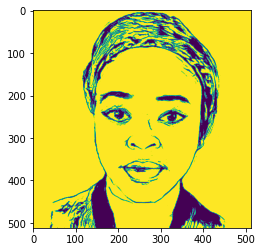

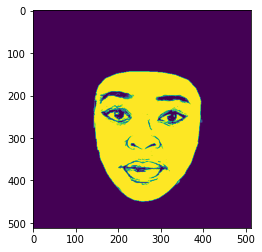

In [17]:
plt.imshow(a)
plt.figure()
plt.imshow(a*b)

In [4]:
# Sketch all imgs
imgs_sketched = [sketcher.run(img)[0] for img in imgs]

KeyboardInterrupt: 

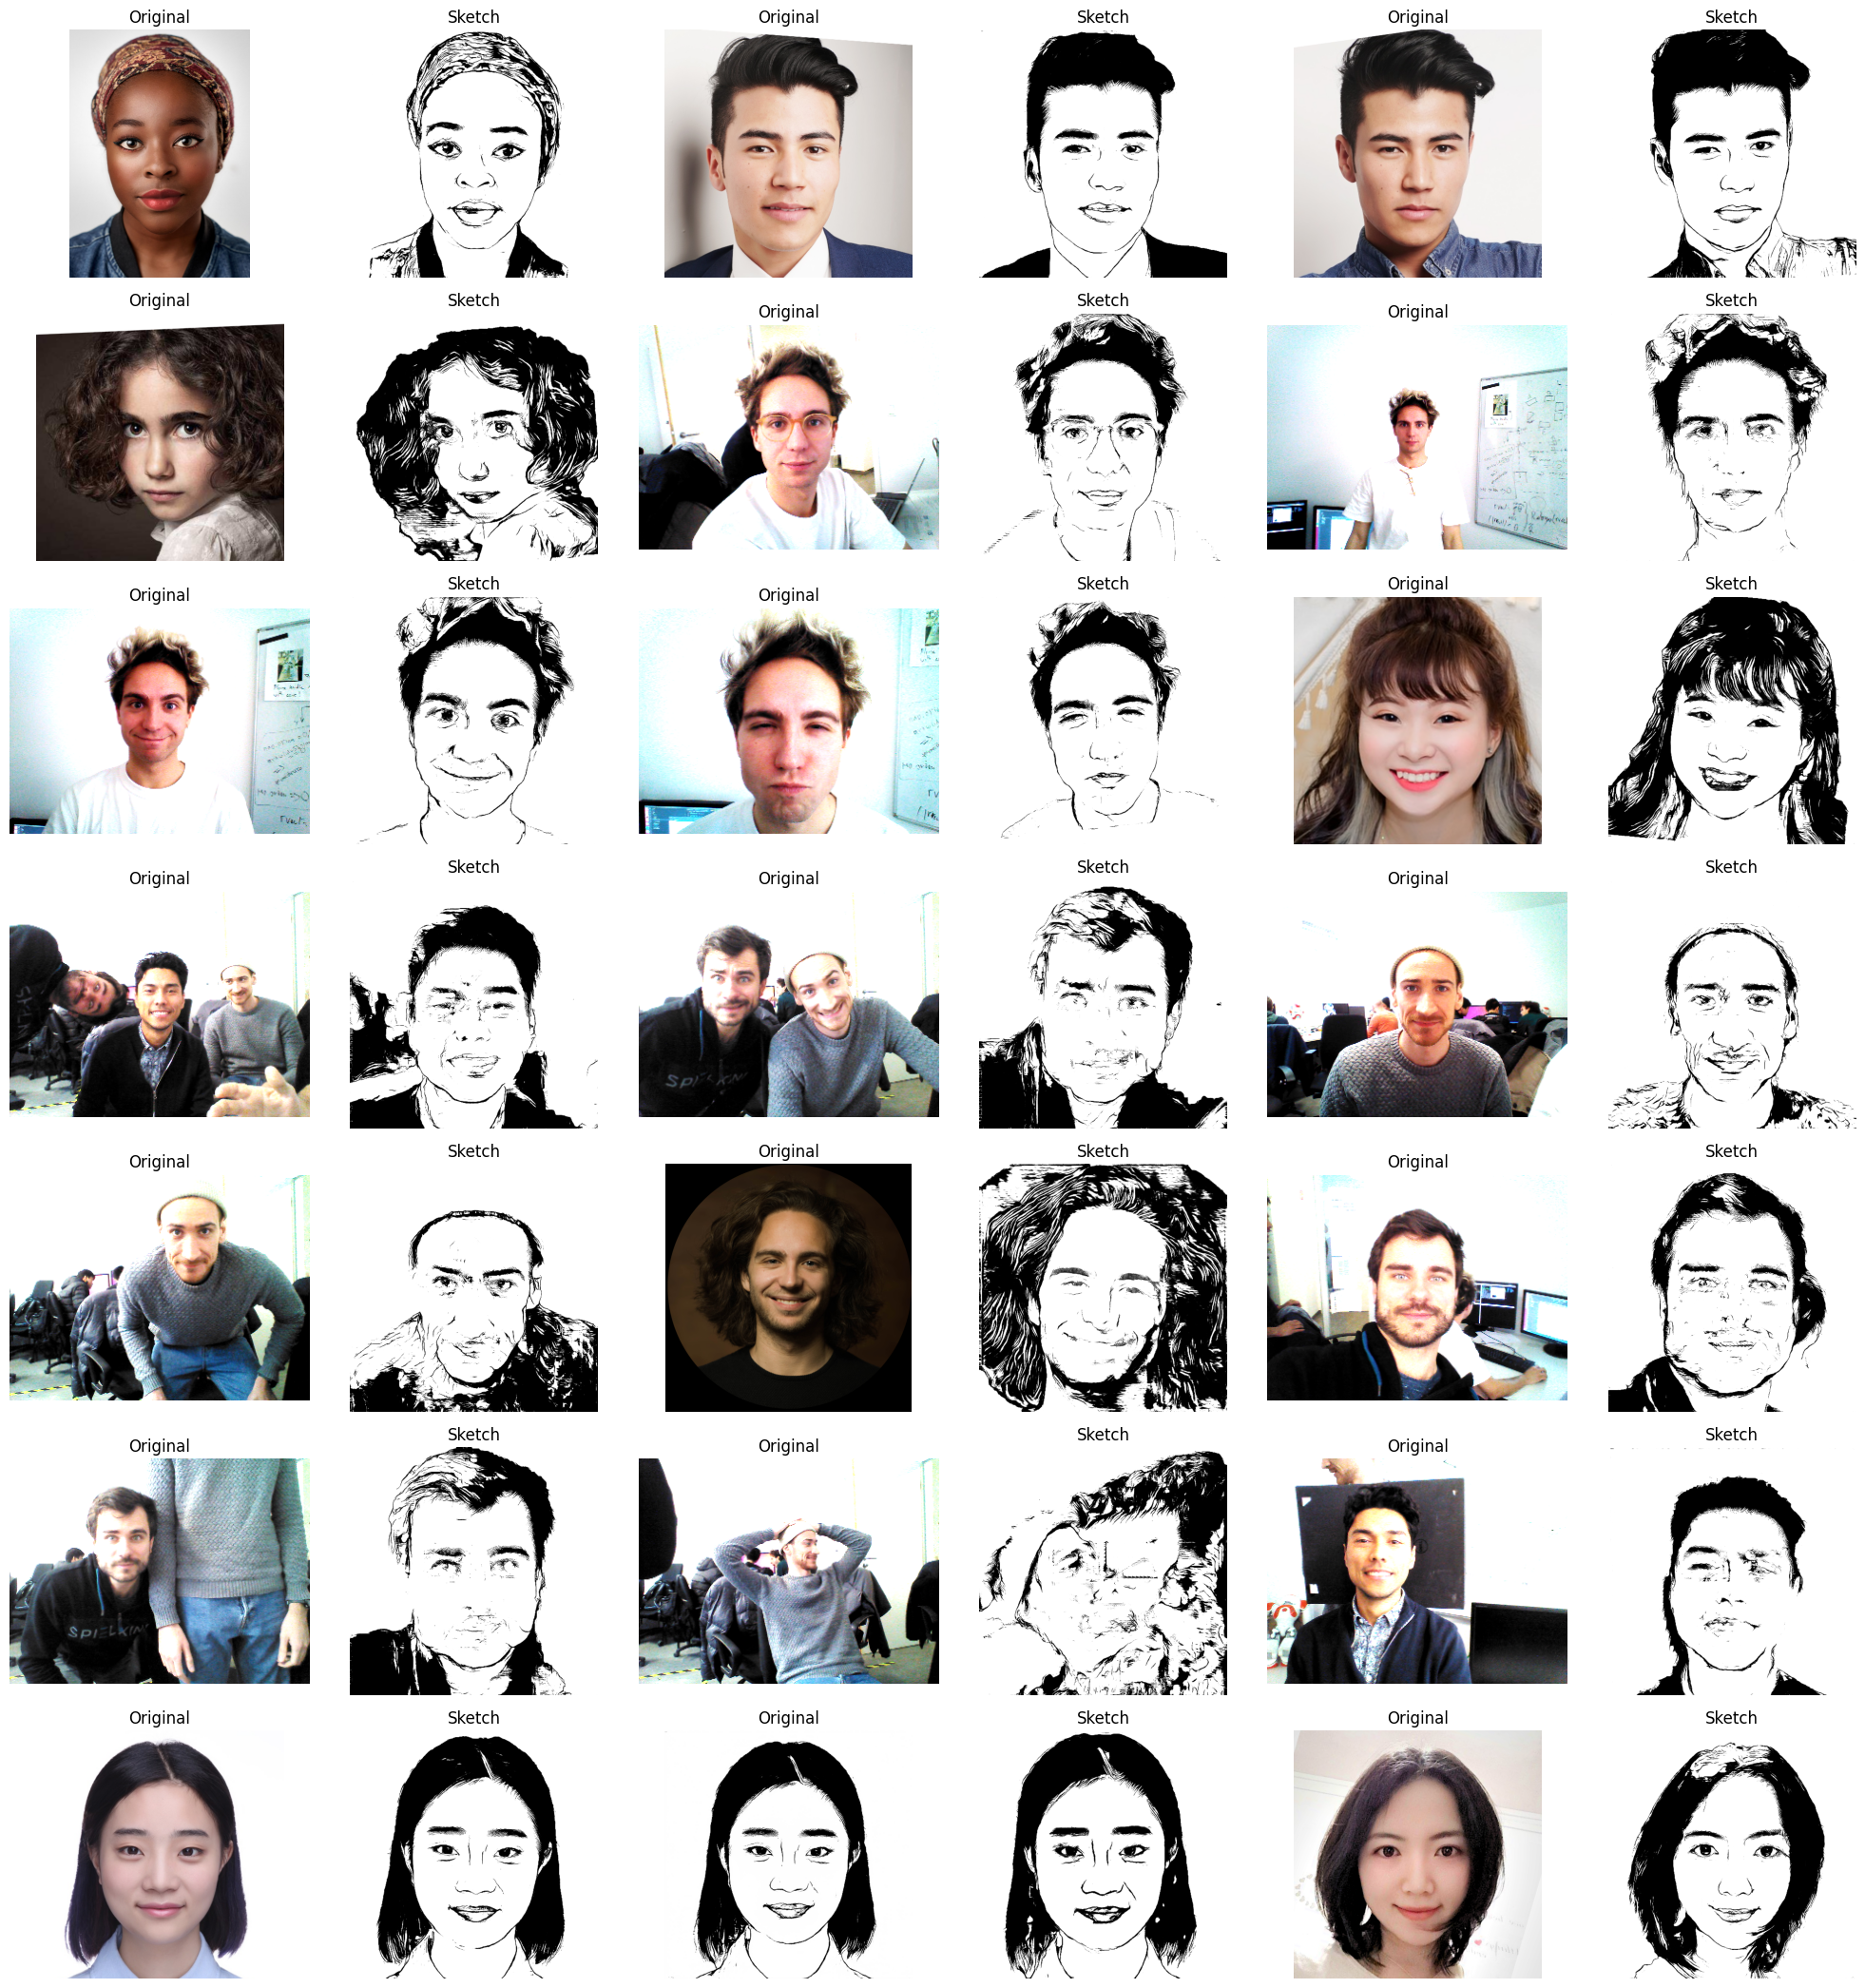

In [5]:
n = len(imgs)
cols = 8
rows = n//4 + n%4
plt.figure(figsize=(20,rows*4))

for num, img in enumerate(imgs):
    plt.subplot(cols,rows,2*num+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Original')
    plt.subplot(cols,rows,2*num+2)
    plt.imshow(imgs_sketched[num], cmap='gray')
    plt.axis('off')
    plt.title('Sketch')
plt.tight_layout()

In [9]:
# filenames = os.listdir(path)
# for name, img in zip(filenames, imgs_sketched):
#     n = os.path.splitext(name)[0] + '_sketch.bmp'
#     cv2.imwrite(n, (255*img).astype(np.uint8))

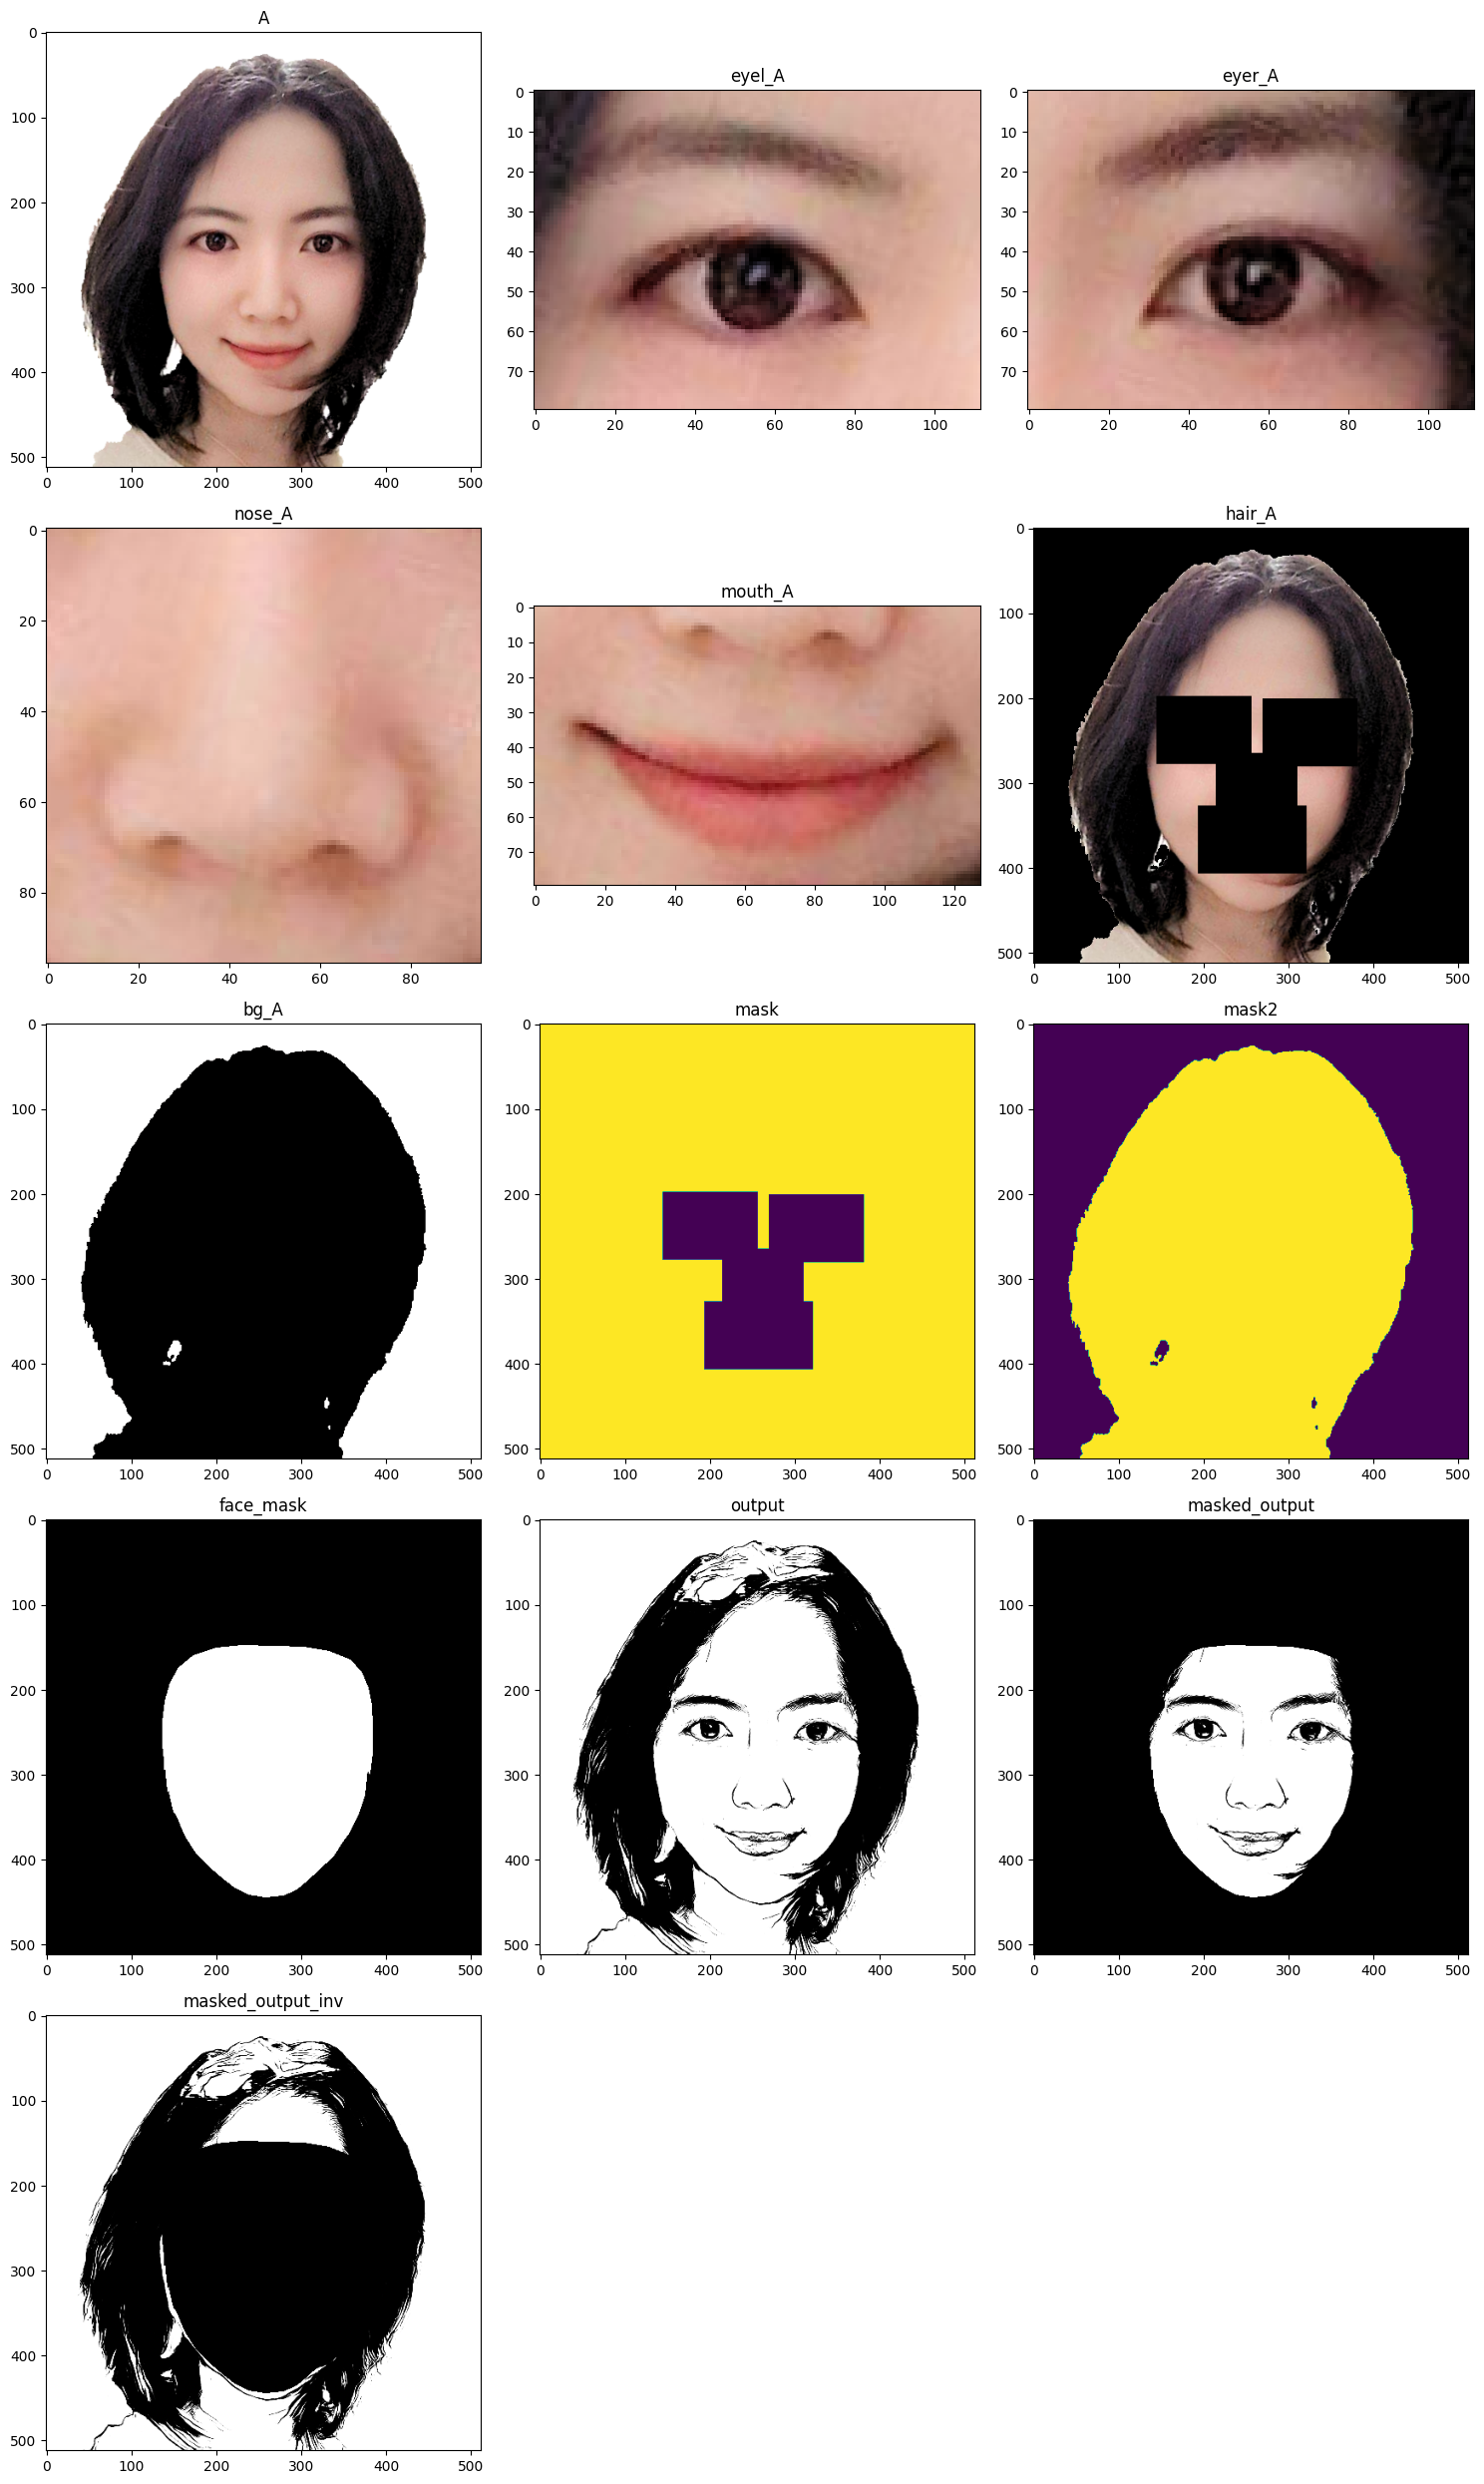

In [4]:
output_img, output_face_mask = sketcher.run(imgs[-1], visualize=True)